## Campus Recruitment

**The dataset contains the list of university students in a campus placement. This data file can be found on [Kaggle](https://www.kaggle.com/benroshan/factors-affecting-campus-placement). In this notebook, we will explore the data and try to understand what factors are important for a student to be recruited.**

Let's first import the data file which is in CSV format by using the [opendatasets](https://github.com/JovianML/opendatasets#opendatasets) library to download it from [Kaggle](https://www.kaggle.com/benroshan/factors-affecting-campus-placement).



In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/benroshan/factors-affecting-campus-placement' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mayuri19
Your Kaggle Key: ········


100%|██████████| 4.51k/4.51k [00:00<00:00, 3.08MB/s]

The dataset has been downloaded and extracted.

In [4]:
# The directory at which the data file is present
data_dir = './factors-affecting-campus-placement'

In [5]:
#let's check the file that is included
import os
os.listdir(data_dir)

['Placement_Data_Full_Class.csv']

### Data Preparation and Cleaning

Let's start by cleaning and preparing the data for exploratory analysis. We will first load the dataset and then handle missing data, remove incorrect or invalid data, and check for potential outliers.



In [10]:
import pandas as pd
import numpy as np

In [11]:
placement_df = pd.read_csv('factors-affecting-campus-placement/Placement_Data_Full_Class.csv')
print("Number of Rows: {}\nNumber of Columns: {}".format(placement_df.shape[0],placement_df.shape[1]))
placement_df.head()

Number of Rows: 215
Number of Columns: 15


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


**The dataset contains a list of 215 students who participated in the placement. We have details about their gender, education, work experience, salary and status(whether the student was hired or not). Let's us look at what each column name describes which is also mentioned in the data section [here](https://www.kaggle.com/benroshan/factors-affecting-campus-placement).**

| Column name    | Description                                                           |
|----------------|-----------------------------------------------------------------------|
| sl_no          | Serial Number                                                         |
| gender         | Gender- (Male - "M", Female - "F")                                    |
| ssc_p          | Secondary Education percentage                                        |
| ssc_b          | Board of Secondary Education (Central/Others)                         |
| hsc_p          | Higher Secondary Education percentage                                 |
| hsc_b          | Higher Secondary Education Board (Central/Others)                     |
| hsc_s          | Higher Secondary Education Specialization (Science/ Commerce/ Others) |
| degree_p       | Undergraduate Degree percentage                                       |
| degree_t       | Undergraduate Degree field                                            |
| workex         | Work Experience                                                       |
| etest_p        | Employability Test (conducted during placement in college) percentage |
| mba_p          | MBA percentage                                                        |
| specialization | MBA/Post graduation specialization                                    |
| status         | Status of placement (Placed / Not Placed)                             |
| salary         | Salary offered to candidate                                           |

In [12]:
#basic information
placement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


Each candidate has been assigned a serial number which is of integer data type. The salary column has missing values when the candidate isn't hired by the company. Let's look at descriptive statistics of the numerical columns.

In [13]:
placement_df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [14]:
#number of missing values in salary
placement_df.salary.isnull().sum()

67

In [15]:
#filling the missing values in salary with 0
placement_df["salary"].fillna(0, inplace = True)

### Exploratory Analysis and Visualization

We'll now explore and analyze the dataset.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [18]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Visualizing the number of observations in each category by using [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) function of seaborn library.

Categorical features:  ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status'] 
Length:  8


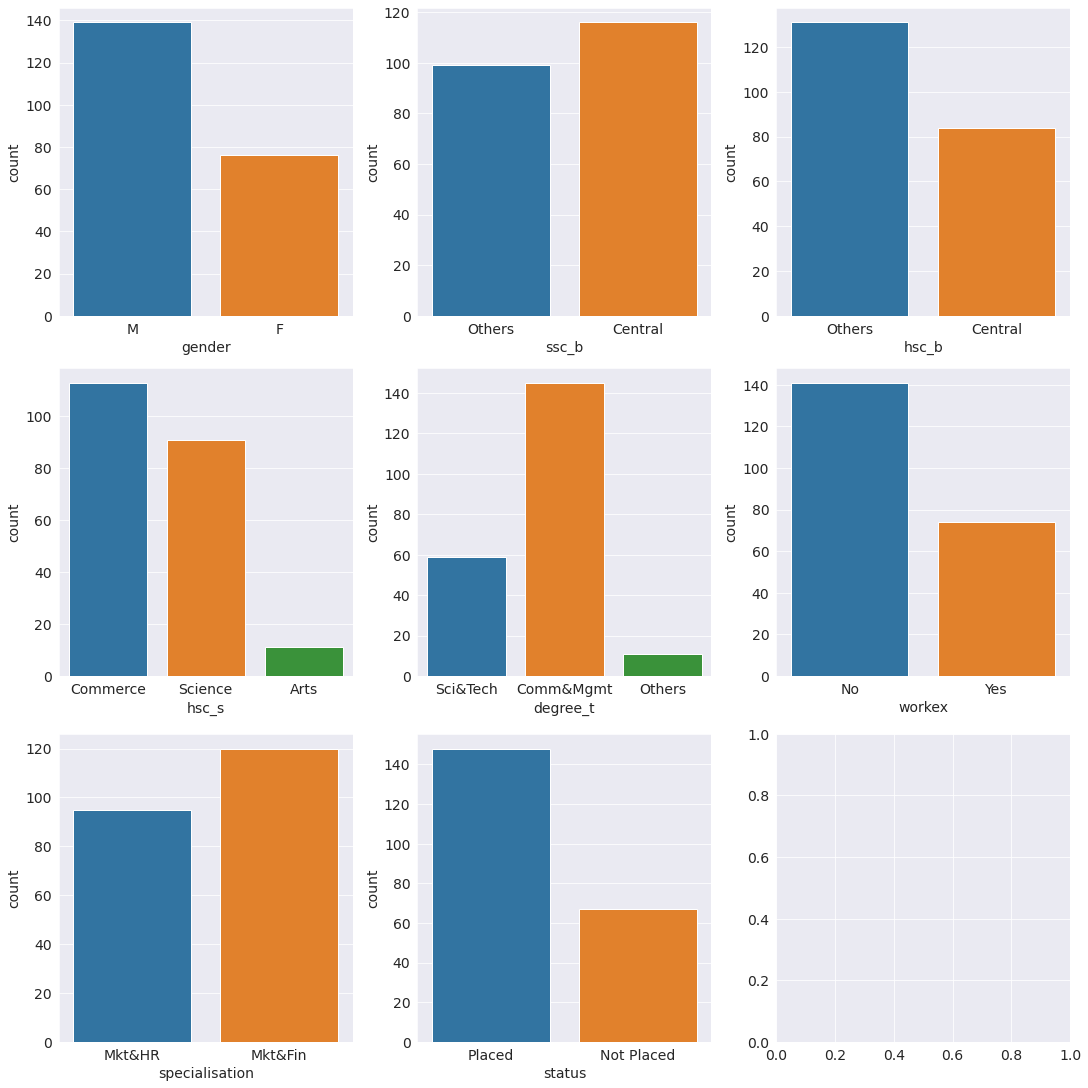

In [19]:
#list of features that have object data type (using info() method we know that all categorical features have object data type)
cat_features = [col for col in placement_df.columns if placement_df.dtypes[col] == "object"]
print("Categorical features: ", cat_features,"\nLength: ", len(cat_features))

total_plots = len(cat_features)
total_cols = 3
total_rows = total_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(5*total_cols, 5*total_rows), constrained_layout=True)
for idx, feature in enumerate(cat_features):
    row = idx//total_cols
    pos = idx % total_cols
    sns.countplot(x=feature, data=placement_df, ax=axs[row][pos])

From above plots we can observe that:
- More than half of the candidates are male.
- The number of students who chose Central Board in Secondary Education reduced in Higher Secondary Education.
- Majority of the students undergraduate field type is Commerce and Management.
- Few students have Arts as their stream in Higher Secondary Education.

In [20]:
print("\n{}% of candidates didn't have any previous work experience.".format(
round(placement_df[placement_df["workex"] == "No"].shape[0]/placement_df.shape[0]*100)))
print("{}% of candidates were hired by the company.".format(
round(placement_df[placement_df["status"] == "Placed"].shape[0]/placement_df.shape[0]*100)))
print("{}% of students were from Other Undergraduate fields.".format(
round(placement_df[placement_df["degree_t"] == "Others"].shape[0]/placement_df.shape[0]*100)))


66% of candidates didn't have any previous work experience.
69% of candidates were hired by the company.
5% of students were from Other Undergraduate fields.


Let's now see the distribution of numeric columns by using [histplot](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.histplot) function of seaborn library.

Numerical features:  ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'] 
Length:  6


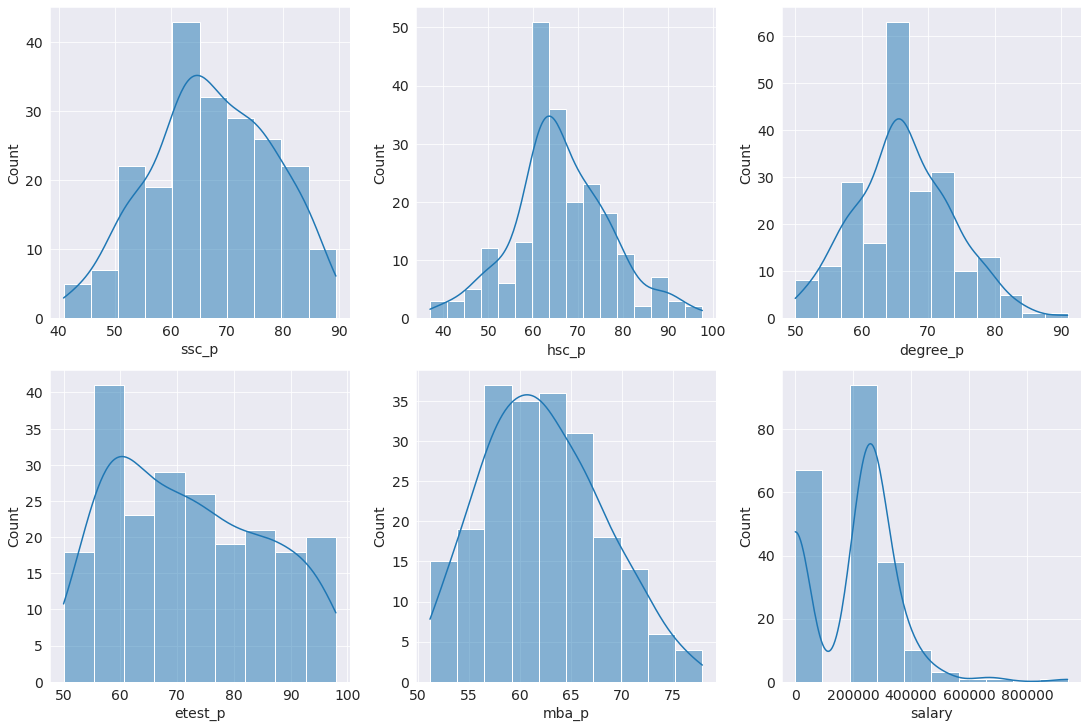

In [21]:
#list of features that have float data type (using info() method we know that all numeric features have float64 data type)
num_features = [col for col in placement_df.columns if placement_df.dtypes[col] == "float"]
print("Numerical features: ", num_features,"\nLength: ", len(num_features))

total_plots = len(num_features)
total_cols = 3
total_rows = total_plots//total_cols 
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(5*total_cols, 5*total_rows), constrained_layout=True)
for idx, feature in enumerate(num_features):
    row = idx//total_cols
    pos = idx % total_cols
    sns.histplot(placement_df[feature], ax=axs[row][pos], kde = True)

- Majority of students scored 55% to 65% in their MBA examination.
- The salary distribution has a mode around 200k and an additional peak at 0 (which describes the salary of the candidates that were not placed.) 
- The range of percentage for degree examination is from 50 to 90, with average score around 65%. 

Performance in Employability Test for male and female students.

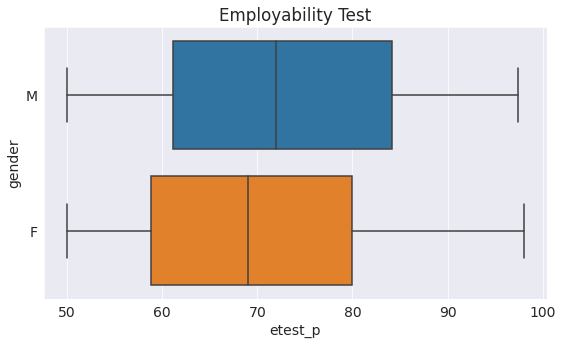

In [22]:
plt.title("Employability Test")
g = sns.boxplot(x = placement_df["etest_p"], y = placement_df["gender"])

The minimum score of all candidates is 50 for the employability test. The highest score belongs to a female candidate. The median value of male students is slightly higher than female students.

Score of Secondary and Higher Secondary Education for all students.

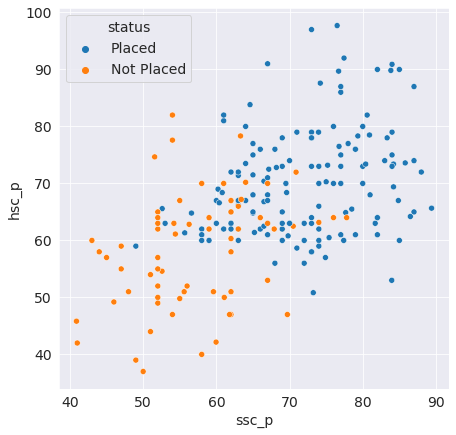

In [23]:
dims = (7, 7)
fig, ax = plt.subplots(figsize=dims)
g = sns.scatterplot(x = "ssc_p",
              y = "hsc_p",
             hue = "status",
              data = placement_df,
                ax = ax
              )

It seems students with higher score in both examinations were placed. Now let's look at the number of students hired from different MBA specialization.

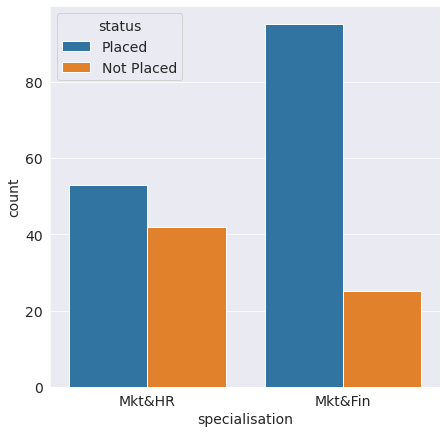

In [24]:
dims = (7, 7)
fig, ax = plt.subplots(figsize=dims)
g= sns.countplot(data = placement_df,
            x = "specialisation",
            hue = "status",
            ax = ax
            )

We can see that most of the students among Marketing & Finance specialization were hired.

Earlier we saw Salary distribution for all candidates. Now, we'll see Salary column distribution for hired candidates.

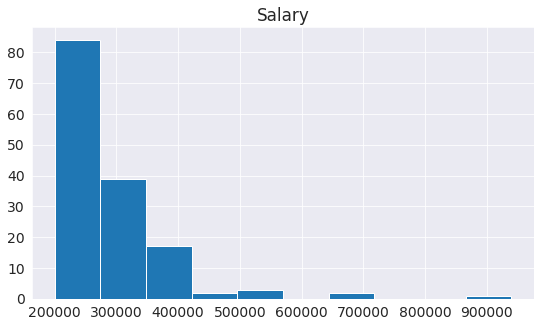

In [25]:
plt.title("Salary")
g = plt.hist(placement_df["salary"][placement_df["salary"] > 0])   

The shape of the distribution is right skewed. From those students that were hired most of them received an annual salary package between 200k and 400k. There is a possible outlier value at 900k.

*Let's try to answer a few questions about the dataset using visualization and summary statistics.*


**Do students with previous work experience get higher average salary?**

We'll use the seaborn's [catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) function to demonstrate the distribution of the two groups with box plots.

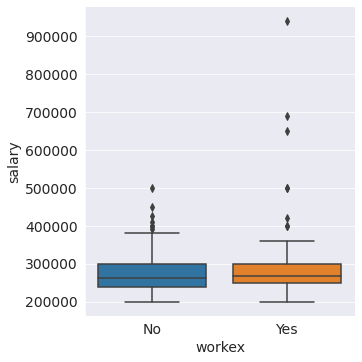

In [28]:
g = sns.catplot(x = "workex",          
                y = "salary", 
                kind = "box",
                data = placement_df[placement_df.salary > 0] )

In [29]:
df = pd.DataFrame()
df["Yes"] = placement_df[(placement_df.workex == "Yes") & (placement_df.salary > 0)]["salary"].describe()
df["No"] = placement_df[(placement_df.workex == "No") & (placement_df.salary > 0)]["salary"].describe()

df

,Yes,No
count,64.000000,84.000000
mean,303265.625000,277523.809524
std,122440.817215,61643.255856
min,200000.000000,200000.000000
25%,250000.000000,240000.000000
50%,267500.000000,262000.000000
75%,300000.000000,300000.000000
max,940000.000000,500000.000000


Few candidates received quite high salaries in the work experience category. On average, there isn't much difference between both the groups. The salary varies more with the students that have work experience.

**What is the empoyability test score for different specializations in MBA?**

In [30]:
df = pd.DataFrame()
df["HR"] = placement_df[placement_df.specialisation == "Mkt&HR"]["etest_p"].describe()
df["FIN"] = placement_df[placement_df.specialisation == "Mkt&Fin"]["etest_p"].describe()

df

,HR,FIN
count,95.000000,120.000000
mean,68.582737,74.885500
std,11.371092,14.039864
min,50.000000,50.000000
25%,59.660000,61.000000
50%,67.000000,75.000000
75%,75.750000,87.662500
max,97.000000,98.000000


The average test score for Marketing & HR is around 68% and the average score for Marketing & Finance is 75%. Let's also visualize the employability test score for both the specializations using [violin plots](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

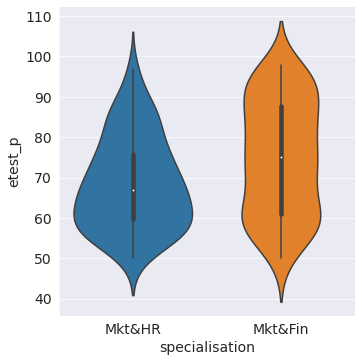

In [31]:
g = sns.catplot(x = "specialisation",
            y  = "etest_p",
            kind = "violin",
            data = placement_df
           )

The shape of the Marketing & Finance distribution is roughly uniform and the shape of the distribution in Marketing & HR is right skewed. The median score and range of values in Marketing & Finance is little higher than Marketing & HR specialization.

**What percentage of women were hired?**

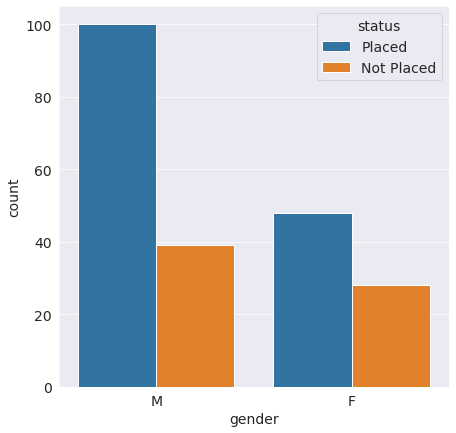

In [32]:
dims = (7, 7)
fig, ax = plt.subplots(figsize=dims)
g = sns.countplot(hue =placement_df.status,
              x = placement_df.gender,
                 ax = ax)

In [33]:
w = placement_df[placement_df.gender == "F"]["status"].value_counts()
print("\nTotal number of female candidates: {}".format(sum(w)))
print("\nPercent of women in total candidates: {0:.2f}%".format(sum(w)/placement_df.shape[0]*100))
print("\nFrom all hired candidates {0:.2f}% were women.".format(w["Placed"]/placement_df[placement_df.status == "Placed"].shape[0]*100))
print("\nFrom all the female candidates {0:.2f}% were hired. ".format(w["Placed"]/sum(w)*100))


Total number of female candidates: 76

Percent of women in total candidates: 35.35%

From all hired candidates 32.43% were women.

From all the female candidates 63.16% were hired. 


**What is the undergraduate field type for most of the hired candidates?**

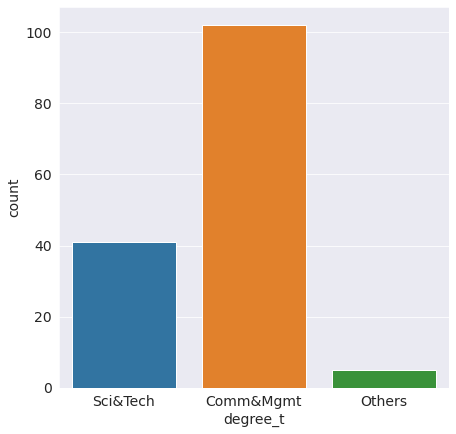

In [34]:
dims = (7, 7)
fig, ax = plt.subplots(figsize=dims)
g = sns.countplot(ax =ax, x = "degree_t", 
              data = placement_df[placement_df.status == "Placed"])

Among the hired candidates, majority of them are from Commerce & Management Undergraduate field.

**Is there a relationship between Secondary and Higher Secondary Education examination marks?**

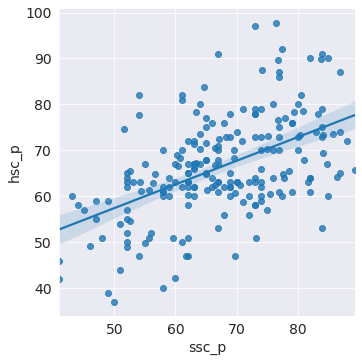

In [35]:
g = sns.lmplot(x ="ssc_p",
           y = "hsc_p",                                 
           data = placement_df
           )

There seems to be a positive correlation between Secondary and Higher Secondary Education marks of the students.

*Let's summarize what we have observed from the above analysis:*
- More than half of the candidates were male. Among the women candidates 63% were hired. 
- The number of students who chose Central Board in Secondary Education reduced in Higher Secondary Education. 
- The range of salary for hired candidates is from 200k to 400k. The salary varies more with candidates that have previous experience.
- Majority of the students were from Commerce and Management undergraduate field.
- The average employability test score was slightly higher in students from Marketing & Finance specialization.

*Some resources that I found helpful:*
- [Kaggle Campus Recruitment Dataset.](https://www.kaggle.com/benroshan/factors-affecting-campus-placement)
- [Jovian.ml Data Analysis with Python.](https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas)
- [seaborn documentation.](https://seaborn.pydata.org/)
- [pandas documentation.](https://seaborn.pydata.org/)
- [opendatasets](https://github.com/JovianML/opendatasets#opendatasets)
- [Dynamic subplot layout in seaborn](https://towardsdatascience.com/dynamic-subplot-layout-in-seaborn-e777500c7386)